# <center> Scientific Programming with Python
## <center> Assignment: Planet Satellites

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** June 4th, 2021

#### Task 1
Goal: Use pandas library to import planet data from four given csv files into a single 
dataframe, while removing incomplete rows and adding a planet name column. The files 
contain the following data about the satellites of Saturn, Jupiter, Uranus and Earth:

| satellite attribute (measure) | data type<sup>1</sup> | least significant figures | meaning |
| :--- | :--- | :--- | :--- |
| Name | string | n.a. | satellite's name|
| Semimajor Axis (km) | float | 6 | orbital diameter of path's major axis|
| Period (days) | float | 3 | time for one orbit around the planet |
| Eccentricity | float | 1 | circularity of orbit, between 0 (circle) and 1 (ellipse) |
| Inclination (deg) | float | 1 | tilt of orbit |
| Mean Diameter (km) | float | 2 | average size |
| Mass (kg) | float | 3 | weight |

<sup>__1__</sup>: For the given csv files pandas correctly determines appropriate data 
types. So no extra conversion is needed.

In [ ]:
import pandas as pd

planet_data = pd.DataFrame()
csv_files = {"Earth": 'earth_satellites.csv', "Jupiter": 'jupiter_satellites.csv',
             "Saturn": 'saturn_satellites.csv', "Uranus": 'uranus_satellites.csv'}

for (planet_name, csv_file) in csv_files.items():
    data_frame = pd.read_csv(csv_file).dropna()                     # only read in complete data
    data_frame["Planet"] = planet_name
    planet_data = planet_data.append(data_frame, ignore_index=True) # append with consistent index

#### Task 2
Goal: identify the largest and smallest satellite diameters from the planet data.

In [83]:
diameter = planet_data["Mean Diameter (km)"]

print("Concerning diameter...")
print("...the smallest satellite is %.1f km." % diameter.min())
print("...the largest satellite is %.1f km." % diameter.max())

Concerning diameter...
...the smallest satellite is 2.8 km.
...the largest satellite is 10536.4 km.


#### Task 3
Goal: create a correlation matrix, based on Pearson's method, of the planet data's 
numerical columns. Also comment on the correlation between the semimajor axis and the 
orbital period. 

Comment: The resulting correlation coefficient between the two mentioned attributes 
almost reaching 1, indicates a strong positive linear dependency between those. This
basically shows, that one of the attributes grows, when the other grows and that it 
shrinks when the other shrinks. Or bluntly put: the bigger/smaller the semimajor axis, 
the longer/shorter the orbital period.

Uses code from: https://stackoverflow.com/q/12725417

In [84]:
matrix = planet_data.select_dtypes("number").corr(method="pearson")  # only use numerical data
matrix

,Semimajor Axis (km),Period (days),Eccentricity,Inclination (deg),Mean Diameter (km),Mass (kg)
Semimajor Axis (km),1.000000,0.983766,0.927188,0.962307,0.004038,-0.017638
Period (days),0.983766,1.000000,0.946545,0.993813,-0.093400,-0.068866
Eccentricity,0.927188,0.946545,1.000000,0.933918,-0.061836,0.097956
Inclination (deg),0.962307,0.993813,0.933918,1.000000,-0.117098,-0.089248
Mean Diameter (km),0.004038,-0.093400,-0.061836,-0.117098,1.000000,0.726364
Mass (kg),-0.017638,-0.068866,0.097956,-0.089248,0.726364,1.000000


#### Task 4
Goal: plot a bar graphs, containing the satellites' names on the x-axis, and their 
semimajor axis and orbital period on the y-axis.

array([<AxesSubplot:title={'center':'Semimajor Axis (km)'}, xlabel='Name'>,
       <AxesSubplot:title={'center':'Period (days)'}, xlabel='Name'>],
      dtype=object)

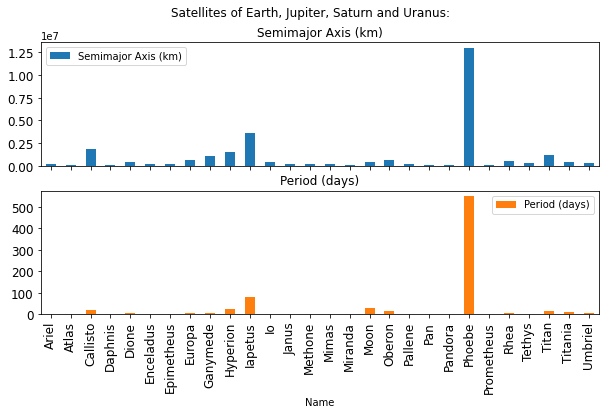

In [114]:
planet_data.sort_values(by=["Name"]).plot(                  # sort for readability
    title="Satellites of Earth, Jupiter, Saturn and Uranus:",
    x="Name", y=["Semimajor Axis (km)", "Period (days)"],
    kind="bar", 
    subplots=True,                                          # show plot for each y-axis
    figsize=(10,5),                                         # set size for readability
    fontsize=12)                                       